In [1]:
import torchvision

In [2]:
import torch as t
import torch.nn as nn

import torch.utils.data as Date
from torch.autograd import Variable as V
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [3]:
model_restnet34=torchvision.models.resnet34()

In [4]:

fc_features = model_restnet34.fc.in_features

In [5]:
model_restnet34.fc = nn.Linear(fc_features, 10)

In [6]:
co_channels=model_restnet34.conv1.in_channels

In [7]:
co_channels

3

In [8]:
model_restnet34.conv1 = nn.Conv2d(1, 64,kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [9]:
t.manual_seed(1) 
EPOCH=1
BATCH_SIZE=50
LR=0.001
DOWN_MNIST=False

In [10]:
train_data=torchvision.datasets.MNIST(root='./mnist/',
                          train=True,
                          transform=torchvision.transforms.ToTensor,
                          download=False,

                          )

In [11]:
test_data=torchvision.datasets.MNIST(root='./mnist/',
                          train=False,
                          transform=torchvision.transforms.ToTensor,
                          download=False,
                          )

In [12]:
train_x=V(t.unsqueeze(train_data.train_data,dim=1),volatile=True).type(t.FloatTensor)/255
train_y=train_data.train_labels
test_x=V(t.unsqueeze(test_data.test_data,dim=1),volatile=True).type(t.FloatTensor)[:2000]/255#測試資料要手動轉
test_y=test_data.test_labels[:2000]

D:\python\envs\two_pthon_deep\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\python\envs\two_pthon_deep\lib\site-packages\ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.
D:\python\envs\two_pthon_deep\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\python\envs\two_pthon_deep\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\python\envs\two_pthon_deep\lib\site-packages\ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing 

In [13]:

torch_dataset_loader=Date.TensorDataset(train_x,train_y)
train_loader=Date.DataLoader(dataset=torch_dataset_loader, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)#訓練批次訓練

In [14]:
model_restnet34

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
optimizer=t.optim.Adam(model_restnet34.parameters(),lr=LR)
loss_func=nn.CrossEntropyLoss()

In [16]:
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

In [17]:
Epoch=0
for epoch in range(2):
    
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = V(x)   # batch x
        b_y = V(y)   # batch y
        
        output = model_restnet34(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        
        b_t_x= V(test_x)
        b_t_y= V(test_y)
        
        
        
        
        
        if step % 100 == 0:
            model_restnet34.eval()
            Epoch+=1
            test_output = model_restnet34(test_x) 
            model_restnet34.train()
            pred_y = t.max(test_output, 1)[1]#因為是relu，所以max取機率最高的機率
            tran_pred_y = t.max(output, 1)[1]
            
            training_loss.append(loss.data)
            val_loss = loss_func(test_output, b_t_y)
            validation_loss.append(val_loss.data)
            
            
            
            
            
            tran_accuracy = (tran_pred_y == y).sum().item() / float(y.size(0))
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            training_accuracy.append(tran_accuracy)
            validation_accuracy.append(accuracy)
            
            
            print('Epoch: ', Epoch, '| train accuracy: %.2f' % tran_accuracy, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy, '- test loss: %.4f' % val_loss.item())


Epoch:  1 | train accuracy: 0.12 | train loss: 2.7569 | test accuracy: 0.09 - test loss: 2.5057
Epoch:  2 | train accuracy: 0.86 | train loss: 0.5116 | test accuracy: 0.78 - test loss: 0.8217
Epoch:  3 | train accuracy: 0.94 | train loss: 0.3243 | test accuracy: 0.82 - test loss: 0.6884
Epoch:  4 | train accuracy: 0.92 | train loss: 0.2922 | test accuracy: 0.92 - test loss: 0.2505
Epoch:  5 | train accuracy: 0.94 | train loss: 0.1422 | test accuracy: 0.92 - test loss: 0.2774
Epoch:  6 | train accuracy: 0.98 | train loss: 0.0940 | test accuracy: 0.95 - test loss: 0.1586
Epoch:  7 | train accuracy: 0.98 | train loss: 0.0333 | test accuracy: 0.96 - test loss: 0.1098
Epoch:  8 | train accuracy: 0.98 | train loss: 0.0480 | test accuracy: 0.94 - test loss: 0.1718
Epoch:  9 | train accuracy: 0.98 | train loss: 0.0741 | test accuracy: 0.97 - test loss: 0.1075
Epoch:  10 | train accuracy: 0.96 | train loss: 0.1673 | test accuracy: 0.95 - test loss: 0.1479
Epoch:  11 | train accuracy: 0.96 | tra

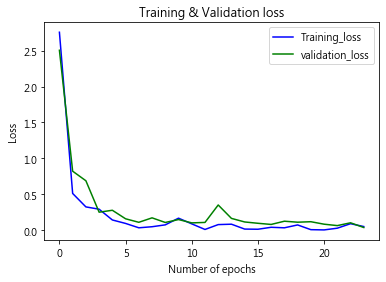

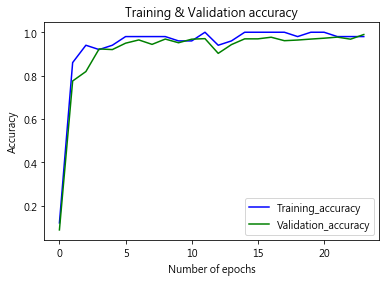

In [19]:
plt.plot(training_loss, 'b-', label='Training_loss')
plt.plot(validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot( training_accuracy, 'b-', label='Training_accuracy')
plt.plot( validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
y_0_9_chance=model_restnet34(test_x[:20])
y_pred=t.max(y_0_9_chance,1)[1].data.numpy().squeeze()
print('實際:',test_y[:20].numpy())
print('預測:',y_pred)

實際: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
預測: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 3 5 9 7 8 4]


In [21]:
from sklearn.metrics import classification_report
y_all=model_restnet34(test_x)
y_pred_all=t.max(y_all,1)[1].data.numpy().squeeze()
target_names = ['0', '1', '2','3','4','5','6','7','8','9']
print(classification_report(test_y.numpy(),y_pred_all,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       175
           1       1.00      0.98      0.99       234
           2       0.99      0.98      0.98       219
           3       0.96      0.98      0.97       207
           4       0.97      0.99      0.98       217
           5       0.99      0.99      0.99       179
           6       0.97      0.98      0.98       178
           7       1.00      0.98      0.99       205
           8       0.95      0.99      0.97       192
           9       0.99      0.95      0.97       194

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [22]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=test_y.numpy(), y_pred=y_pred_all)
print(confmat)

[[175   0   0   0   0   0   0   0   0   0]
 [  0 229   0   3   0   0   0   1   1   0]
 [  0   0 214   1   0   0   1   0   3   0]
 [  0   0   0 202   0   1   0   0   4   0]
 [  0   0   0   0 214   0   3   0   0   0]
 [  0   0   0   0   1 178   0   0   0   0]
 [  2   0   0   0   0   1 175   0   0   0]
 [  0   0   3   1   0   0   0 201   0   0]
 [  0   0   0   0   0   0   1   0 190   1]
 [  0   0   0   3   5   0   0   0   1 185]]
